# Experimenting with Monte-Carlo methods

Now building on what you did in the first notebook, we are going to experiment a bit with Monte-Carlo methods and convince ourselves they work.

____
## Average value of a dice roll

First we will check some of the statistics calculations we did yesterday - that the average value of a dice roll is 3.5, and that the average value of a dice roll **squared** is $91/6 \approx 15.17$.
Write two functions to evaluate these for `n` dice rolls

In [3]:
import numpy as np
from numpy import random

# Hint: For both functions you will want to use the random.randint function, where random.randint(a,b) will give a 
# random integer greater than or equal to a, but less than b, to simulate a dice roll

def average_dice(n):
    return np.mean(random.randint(1,7, n))

def average_dice_squared(n):
    return np.mean(random.randint(1,7, n)**2)

Now plot the results your function give, as a function of `n`, i.e. how many dice throws you make.
We've sketched out the sort of code you will need

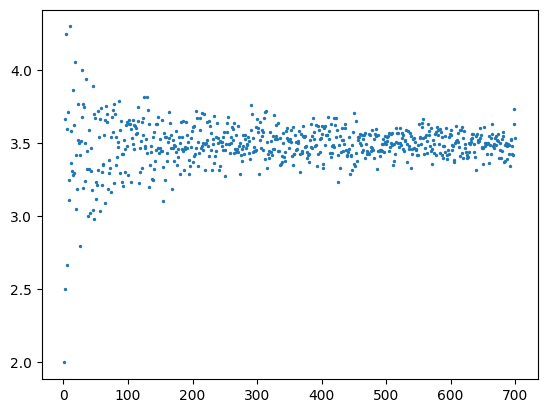

In [68]:
import matplotlib.pyplot as plt


max_n = 700 # Some large number here
n_values = np.arange(1, max_n+1)

# Set up an empty array to store the results in
average_vals = np.zeros(max_n)

# Now write a loop to fill the average_vals array
for i, n in enumerate(n_values):
    average_vals[i] = average_dice(n)

plt.scatter(n_values, average_vals, s=2)

___

Now we will use the function you wrote in Exercise 1c, `integrate_x_0_1`, and show that this also converges to the correct answer, just like the average dice roll functions did.

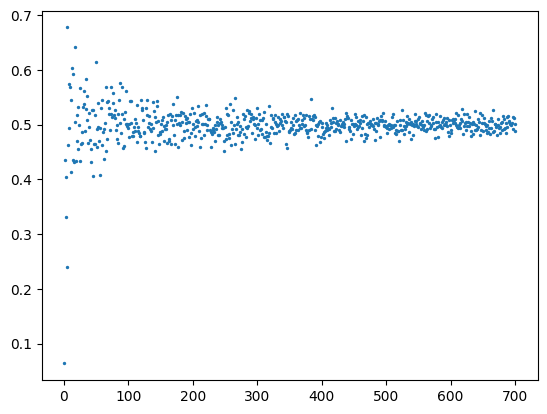

In [71]:
def integrate_x_0_1(n_points):
    total = 0
    for i in range(n_points):
        x_i = random.uniform(0,1)
        total += x_i
    result = total * (1 - 0) / n_points
    return result


import matplotlib.pyplot as plt

max_n = 700 # Some large number here
n_values = np.arange(1, max_n+1)

# Set up an empty array to store the results in
average_vals = np.zeros(max_n)

# Now write a loop to fill the average_vals array
for i, n in enumerate(n_values):
    average_vals[i] = integrate_x_0_1(n)

plt.scatter(n_values, average_vals, s=2)

Finally, let's do something more complicated - let's try and estimate the integral
$$
\int_0^1 e^{\sin (x)} dx
$$
which has no analytic solution!
To start with, modify your `integrate_x_0_1` so it takes a second argument, which is a python function representing the integrand.
We've given you a simple function to start with `my_simple_function`, such that `integrate_myfunction_0_1(n, my_simple_function)` should give the same result as `integrate_x_0_1`.

In [1]:
def integrate_myfunction_0_1(n_points, my_function):
    total = 0
    for i in range(n_points):
        x_i = random.uniform(0,1)
        total += my_function(x_i)
    result = total * (1 - 0) / n_points
    return result

def my_simple_function(x):
    return x

Now define a new function that represents the integrand of the integral above, and see what your Monte-Carlo tells you the result is for `n_points = 1`, `10` or `50`. What do you think the correct answer is? How might you decide? (Hint: plotting the result for different values of `n_points` as you did above might be useful )

In [5]:
def my_complicated_function(x):
    return np.exp(np.sin(x))

integrate_myfunction_0_1(10000, my_complicated_function)

np.float64(1.62580676873776)

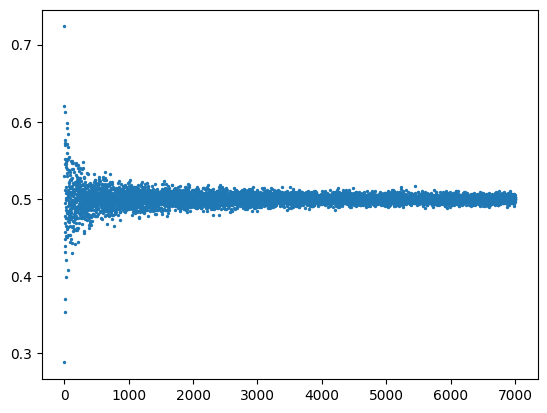

In [6]:
import matplotlib.pyplot as plt

max_n = 7000 # Some large number here
n_values = np.arange(1, max_n+1)

# Set up an empty array to store the results in
average_vals = np.zeros(max_n)

# Now write a loop to fill the average_vals array
for i, n in enumerate(n_values):
    average_vals[i] = integrate_myfunction_0_1(n, my_simple_function)

plt.scatter(n_values, average_vals, s=2)